In [73]:
# link: https://www.kaggle.com/startupsci/titanic-data-science-solutions
# data analysis and wranglng
import string
import pandas as pd
import numpy as np
import random as rnd

#visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#machine learning
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [4]:
train_df = pd.read_excel('train.xlsx')
test_df = pd.read_excel('test.xlsx')
combine = [train_df,test_df]

In [5]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

#numerical features can be discrete گسسته , continuous or time-series based.

In [6]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# ticket is mix of numerocal and alphanumerical -----   cabin is alphanumeric

In [8]:
corr = train_df.corr()

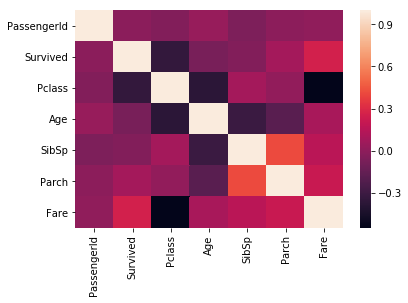

In [9]:
sns.heatmap(corr)

In [10]:
train_df.info()
print('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [11]:
train_df.count(axis="columns")

0      11
1      12
2      11
3      12
4      11
5      10
6      12
7      11
8      11
9      11
10     12
11     12
12     11
13     11
14     11
15     11
16     11
17     10
18     11
19     10
20     11
21     12
22     11
23     12
24     11
25     11
26     10
27     12
28     10
29     10
       ..
861    11
862    12
863    10
864    11
865    11
866    11
867    12
868    10
869    11
870    11
871    12
872    12
873    11
874    11
875    11
876    11
877    11
878    10
879    12
880    11
881    11
882    11
883    11
884    11
885    11
886    11
887    12
888    10
889    12
890    11
Length: 891, dtype: int64

In [12]:
# train data is 891 out of 2224  ====> 40%

In [13]:
len(train_df[train_df['Name'].str.contains('Mr.')])  # counts Mr. in Name column.


647

In [14]:

len(train_df[train_df['Name'].str.contains('Mrs.')])  # counts Mrs. in Name column.

129

In [15]:
train_df[train_df['Name'].str.contains('Mrs.')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S


In [16]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Collyer, Miss. Marjorie ""Lottie""",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [18]:
train_df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [19]:
train_df[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [20]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [21]:
train_df[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [22]:
train_df[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0D0C0BB0>]],
      dtype=object)

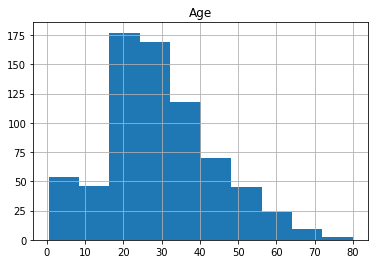

In [23]:
train_df.hist('Age')

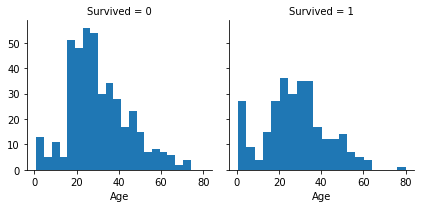

In [24]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

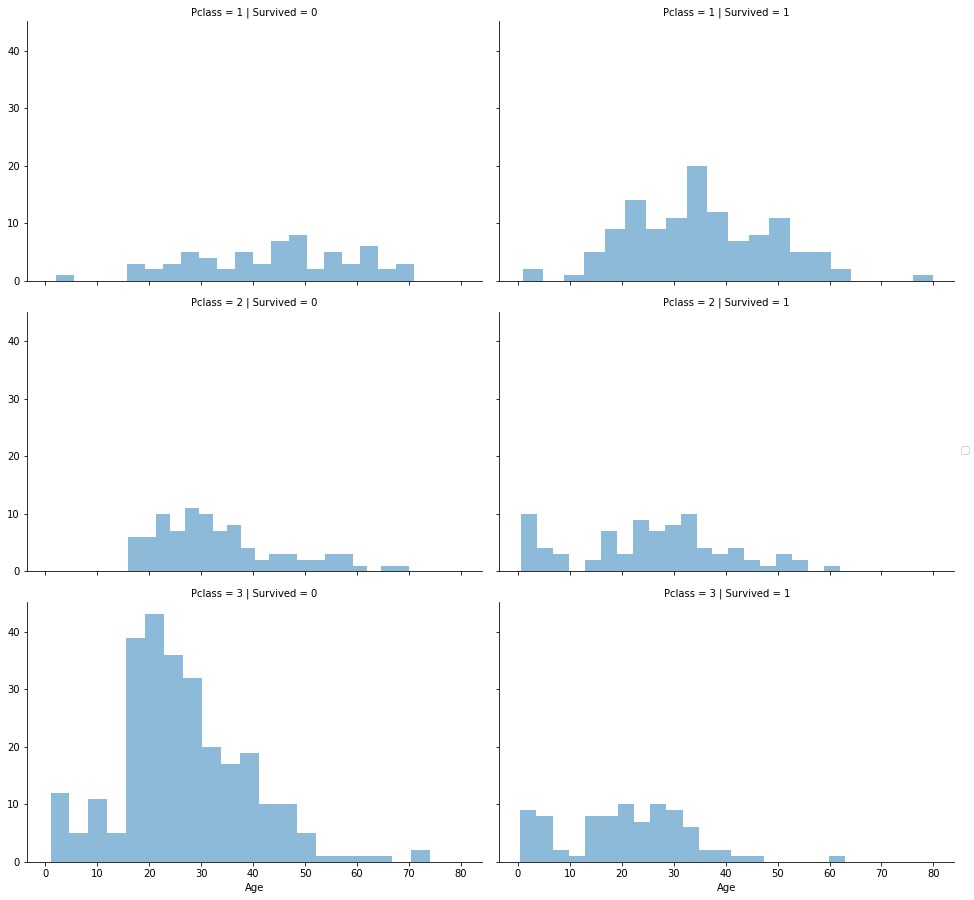

In [25]:
#Correlating numerical and ordinal features

grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=4.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()

c:\users\mojiway\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\mojiway\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


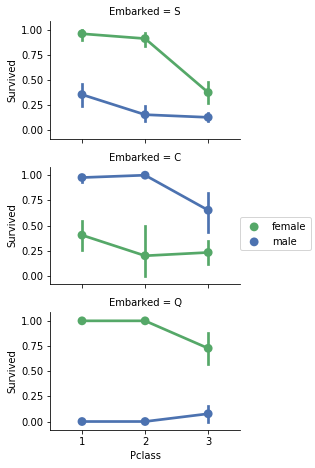

In [26]:
#Correlating categorical features

grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

c:\users\mojiway\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


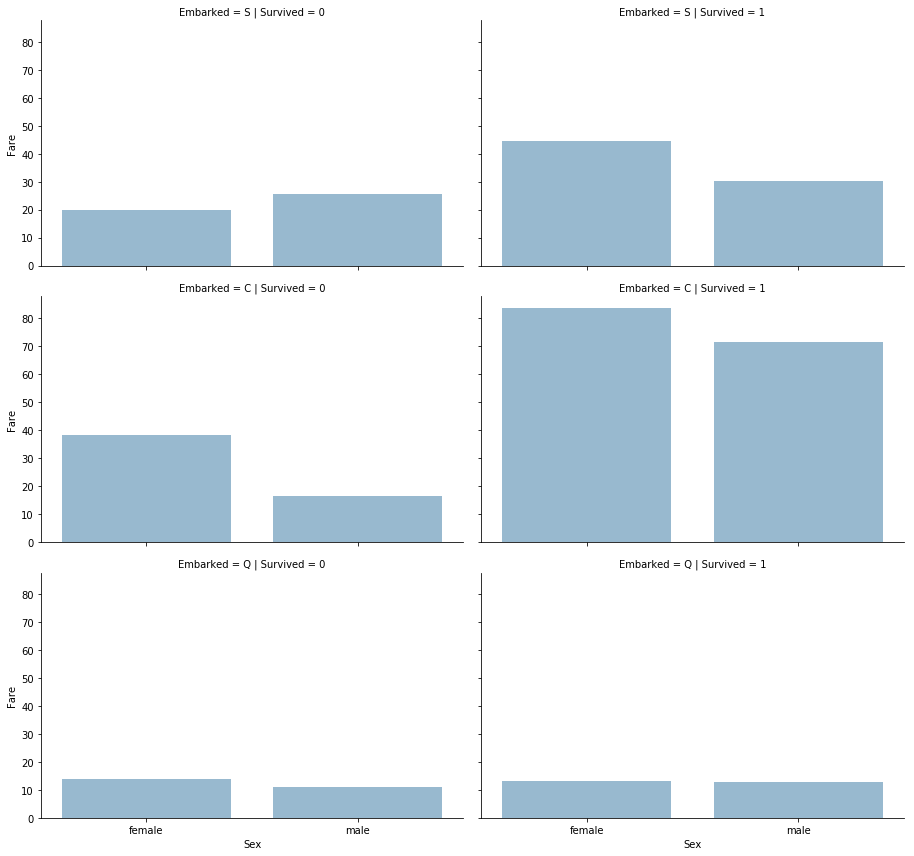

In [27]:
# Correlating categorical and numerical features

grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=4, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)

In [28]:
print('Before',train_df.shape,test_df.shape,combine[0].shape,combine[1].shape )

Before (891, 12) (418, 11) (891, 12) (418, 11)


In [29]:
train_df = train_df.drop(['Ticket','Cabin'],axis=1)

In [30]:
test_df = test_df.drop(['Ticket','Cabin'],axis=1)

In [31]:
combine = [train_df,test_df]

In [32]:
print('After',train_df.shape,test_df.shape,combine[0].shape,combine[1].shape )

After (891, 10) (418, 9) (891, 10) (418, 9)


In [33]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_df['Title'],train_df['Sex'])    

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [34]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    

In [35]:
train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [36]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [37]:

train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,3


In [38]:
train_df.isnull().sum()  

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Title            0
dtype: int64

In [39]:
train_df = train_df.drop(['Name','PassengerId'],axis=1)


In [40]:
train_df = train_df.dropna(subset=['Age'])

In [41]:
test_df = test_df.drop(['Name'],axis=1)

In [42]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,1
1,893,3,female,47.0,1,0,7.0000,S,3
2,894,2,male,62.0,0,0,9.6875,Q,1
3,895,3,male,27.0,0,0,8.6625,S,1
4,896,3,female,22.0,1,1,12.2875,S,3
5,897,3,male,14.0,0,0,9.2250,S,1
6,898,3,female,30.0,0,0,7.6292,Q,2
7,899,2,male,26.0,1,1,29.0000,S,1
8,900,3,female,18.0,0,0,7.2292,C,3
9,901,3,male,21.0,2,0,24.1500,S,1


In [43]:
train_df.shape, test_df.shape

((714, 9), (418, 9))

In [44]:
combine = [train_df,test_df]

In [45]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1,'male':0 }).astype(int)

In [46]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


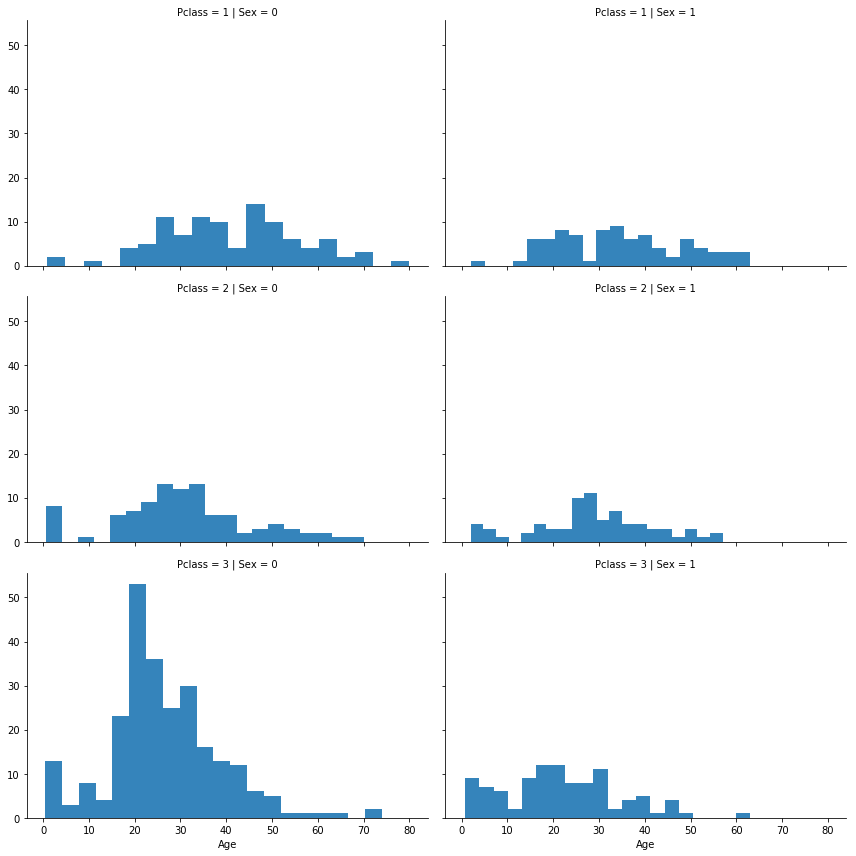

In [47]:
grid = sns.FacetGrid(train_df,row='Pclass',col='Sex',size=4,aspect=1.5)
grid.map(plt.hist,'Age',alpha=0.9,bins=20)

In [48]:
guess_ages = np.zeros((2,3))

In [49]:
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [50]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [51]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.370690
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [52]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train_df.head()
    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [53]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [54]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1
6,0,1,0,3,0,0,51.8625,S,1
7,0,3,0,0,3,1,21.0750,S,4
8,1,3,1,1,0,2,11.1333,S,3
9,1,2,1,0,1,0,30.0708,C,3
10,1,3,1,0,1,1,16.7000,S,2


In [55]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
train_df[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.777778
2,3,0.569892
1,2,0.546763
6,7,0.333333
0,1,0.321782
4,5,0.272727
5,6,0.136364
7,8,0.000000


In [56]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [57]:
train_df[['IsAlone','Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.516129
1,1,0.321782


In [58]:
train_df.drop(['Parch','SibSp','FamilySize'], axis=1)
test_df.drop(['Parch','SibSp','FamilySize'], axis=1)
combine = [train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,1,0,7.2500,S,1,2,0
1,1,1,1,2,1,0,71.2833,C,3,2,0
2,1,3,1,1,0,0,7.9250,S,2,1,1
3,1,1,1,2,1,0,53.1000,S,3,2,0
4,0,3,0,2,0,0,8.0500,S,1,1,1


In [59]:
for dataset in combine:
    dataset['Age*Class'] = dataset['Age'] * dataset['Pclass']

In [60]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [61]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
train_df[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived', ascending=False)    

,Embarked,Survived
0,C,0.607692
2,S,0.365108
1,Q,0.285714


In [62]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )

In [63]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,892,3,0,2,0,0,7.8292,2,1,1,1,6
1,893,3,1,2,1,0,7.0000,0,3,2,0,6
2,894,2,0,3,0,0,9.6875,2,1,1,1,6
3,895,3,0,1,0,0,8.6625,0,1,1,1,3
4,896,3,1,1,1,1,12.2875,0,3,3,0,3


In [64]:
train_df['FareBond'] = pd.qcut(train_df['Fare'],4)

In [65]:
train_df[['FareBond','Survived']].groupby(['FareBond'],as_index=False).mean().sort_values(by='FareBond', ascending=False)

,FareBond,Survived
3,"(33.375, 512.329]",0.620112
2,"(15.742, 33.375]",0.480226
1,"(8.05, 15.742]",0.329341
0,"(-0.001, 8.05]",0.204188


In [66]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBond'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,0,3,0,1,1,0,0,0,1,2,0,3
1,1,1,1,2,1,0,3,1,3,2,0,2
2,1,3,1,1,0,0,1,0,2,1,1,3
3,1,1,1,2,1,0,3,0,3,2,0,2
4,0,3,0,2,0,0,1,0,1,1,1,6
6,0,1,0,3,0,0,3,0,1,1,1,3
7,0,3,0,0,3,1,2,0,4,5,0,0
8,1,3,1,1,0,2,1,0,3,3,0,3
9,1,2,1,0,1,0,2,1,3,2,0,0
10,1,3,1,0,1,1,2,0,2,3,0,0


In [67]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,892,3,0,2,0,0,0,2,1,1,1,6
1,893,3,1,2,1,0,0,0,3,2,0,6
2,894,2,0,3,0,0,1,2,1,1,1,6
3,895,3,0,1,0,0,1,0,1,1,1,3
4,896,3,1,1,1,1,1,0,3,3,0,3
5,897,3,0,0,0,0,1,0,1,1,1,0
6,898,3,1,1,0,0,0,2,2,1,1,3
7,899,2,0,1,1,1,2,0,1,3,0,2
8,900,3,1,1,0,0,0,1,3,1,1,3
9,901,3,0,1,2,0,2,0,1,3,0,3


In [68]:
# logistic ergression

In [71]:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df.drop('PassengerId',axis=1)
X_train.shape, y_train.shape, X_test.shape


((714, 11), (714,), (418, 11))

In [75]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
prediction = logreg.predict(X_test)
accuracy = round(logreg.score(X_train,y_train)*100,2)
accuracy

80.95

In [76]:
logreg.coef_

array([[-0.67615647,  2.13273232, -0.20399125, -0.5498328 , -0.15696009,
         0.19385715,  0.04470914,  0.4465995 , -0.06695267, -0.33651538,
        -0.23736211]])

In [77]:
# Positive coefficients will make the prediction better. the higher the coefficient the more correlation. 
#second feature is so high correlated which is SEX. it means by increasing sex from 0 to 1 (male ot female) the chance of survival is so high.


In [82]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,0,3,0,1,1,0,0,0,1,2,0,3
1,1,1,1,2,1,0,3,1,3,2,0,2
2,1,3,1,1,0,0,1,0,2,1,1,3
3,1,1,1,2,1,0,3,0,3,2,0,2
4,0,3,0,2,0,0,1,0,1,1,1,6


In [94]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.132732
7,Title,0.446599
5,Fare,0.193857
6,Embarked,0.044709
8,FamilySize,-0.066953
4,Parch,-0.156960
2,Age,-0.203991
10,Age*Class,-0.237362
9,IsAlone,-0.336515
3,SibSp,-0.549833


In [99]:
svc = SVC()
svc.fit(X_train,y_train)
prediction = svc.predict(X_test)
accuracy = round(svc.score(X_train,y_train)*100,2)
accuracy

84.31